### Mateo Tejera - **`Segundo Trabajo Práctico`** - `Métodos Computacionales`

#### `Parte 1: Descenso de Gradiente`

In [4]:
%load_ext autoreload
%autoreload 2

##### Imports

In [ ]:
import numpy as np
from tqdm.auto import tqdm
import cupy as cp

##### Constants

In [6]:
SEED = 42
healthy_path = "data/raw/Healthy"
parkinson_path = "data/raw/Parkinson"

##### Load Data

In [7]:
# Carga y División de Datos
from src.load_data import split_dataset 

X_train, y_train, X_test, y_test = split_dataset( 
    healthy_dir=healthy_path,
    parkinson_dir=parkinson_path,
    test_ratio=0.2,
    size=(64, 64),
    seed=SEED
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1304, 4096)
y_train shape: (1304,)
X_test shape: (328, 4096)
y_test shape: (328,)


##### `EJERCICIO 1 DERIVADAS`

In [8]:
# Función de activación
def f_wb(x, w, b):
    return (np.tanh(np.dot(x, w) + b) + 1) / 2

# Derivadas parciales de la función de pérdida L respecto a w y b
def derivadas_parciales(X, y, w, b):
    t = np.tanh(np.dot(X, w) + b)            # activación
    f = f_wb(X, w, b)                        # activación con tanh normalizada

    error = f - y                           # diferencia entre predicción y verdadero

    # derivadas con regla de la cadena (tanh') = 1 - tanh²
    # y sabiendo que la loss es L(w, b) = MSE = 1/N ∑(fi - yi)², entonces:
    # 2/N (fi - yi) * dfi/dw o dfi/db
    df_dw = 2 * np.dot((error * 0.5*((1 - t**2))), X) / len(X)
    df_db = 2 * np.sum((error * 0.5*((1 - t**2)))) / len(X)

    return df_dw, df_db

##### `EJERCICIO 2 DESCENSO POR GRADIENTE`

In [ ]:
def train_model(X_train, y_train, X_test=None,  y_test=None, seed= SEED, alpha=0.001, max_epochs=10000):
    np.random.seed(seed)
    w = np.random.randn(X_train.shape[1]) * 0.01 
    b = 0.0

    loss_history_train = []
    acc_history_train  = []
    loss_history_test  = []
    acc_history_test   = []

    for epoch in tqdm(range(1, max_epochs+1), desc="Training", dynamic_ncols=True):
        # ==== train step ====
        f_train = f_wb(X_train, w, b)
        loss_t  = np.mean((f_train - y_train)**2)
        acc_t   = np.mean((f_train > 0.5) == (y_train > 0.5))
        loss_history_train.append(loss_t)
        acc_history_train.append(acc_t)

        # gradiente y actualización
        grad_w, grad_b = derivadas_parciales(X_train, y_train, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

        # ==== test evaluation ====
        if X_test is not None and y_test is not None:
            f_test = f_wb(X_test, w, b)
            loss_te  = np.mean((f_test - y_test)**2)
            acc_te   = np.mean((f_test > 0.5) == (y_test > 0.5))
            loss_history_test.append(loss_te)
            acc_history_test.append(acc_te)

        if epoch == 1 or epoch % (max_epochs/50) == 0:
            msg = f"Epoch {epoch:4d} | Train loss={loss_t:.4f}, acc={acc_t:.4f}"
            if loss_history_test:
                msg += f" | Test loss={loss_te:.4f}, acc={acc_te:.4f}"
            tqdm.write(msg)

    return w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test

##### `EJERCICIO 3`

In [ ]:
from src.metrics import accuracy 

In [ ]:
def evaluate_model(X, y, w, b):
    f =  f_wb(X, w, b)
    mse = np.mean((f - y)**2)
    acc = accuracy(y, f) 
    return mse, acc

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch   20 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch   40 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch   60 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch   80 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  100 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  120 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  140 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  160 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  180 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  220 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  240 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  260 | Train loss=0.5000, acc=0.

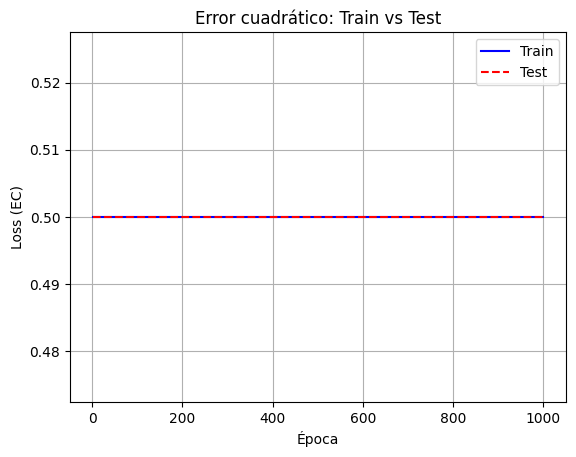

In [ ]:
# Entrenamiento
w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train, y_train, X_test, y_test, alpha=0.01, max_epochs=1000)

mse_train, acc_train = evaluate_model(X_train, y_train, w, b)
mse_test, acc_test = evaluate_model(X_test, y_test, w, b)

print(f"Train MSE: {mse_train:.4f} | Accuracy: {acc_train:.4f}")
print(f"Test  MSE: {mse_test:.4f} | Accuracy: {acc_test:.4f}")

In [ ]:
from src.plot import plot_loss

In [ ]:
# Graficar ambas curvas
plot_loss(loss_history_train, loss_history_test)

##### `EJERCICIO 4 NORMALIZACIÓN`

In [ ]:
from src.load_data import normalizar_dataset

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3146, acc=0.5000 | Test loss=0.3044, acc=0.5000
Epoch   20 | Train loss=0.2511, acc=0.4962 | Test loss=0.2515, acc=0.4726
Epoch   40 | Train loss=0.2506, acc=0.4962 | Test loss=0.2512, acc=0.4634
Epoch   60 | Train loss=0.2506, acc=0.4946 | Test loss=0.2511, acc=0.4665
Epoch   80 | Train loss=0.2506, acc=0.4939 | Test loss=0.2511, acc=0.4665
Epoch  100 | Train loss=0.2506, acc=0.4946 | Test loss=0.2511, acc=0.4665
Epoch  120 | Train loss=0.2506, acc=0.4954 | Test loss=0.2511, acc=0.4665
Epoch  140 | Train loss=0.2505, acc=0.4954 | Test loss=0.2511, acc=0.4665
Epoch  160 | Train loss=0.2505, acc=0.4946 | Test loss=0.2511, acc=0.4665
Epoch  180 | Train loss=0.2505, acc=0.4962 | Test loss=0.2511, acc=0.4665
Epoch  200 | Train loss=0.2505, acc=0.4962 | Test loss=0.2511, acc=0.4665
Epoch  220 | Train loss=0.2505, acc=0.4977 | Test loss=0.2511, acc=0.4665
Epoch  240 | Train loss=0.2505, acc=0.4977 | Test loss=0.2510, acc=0.4695
Epoch  260 | Train loss=0.2505, acc=0.

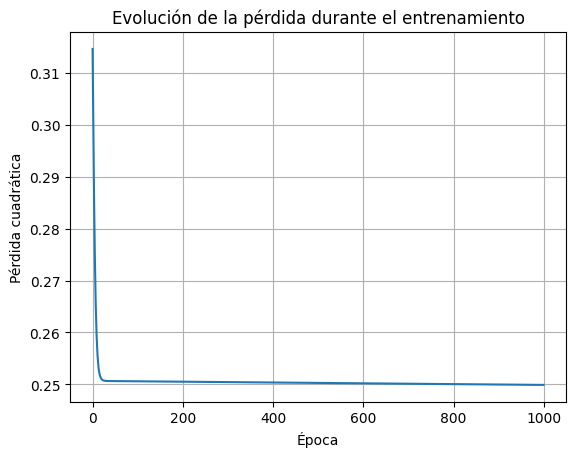

In [ ]:
X_train_n = normalizar_dataset(X_train)
X_test_n = normalizar_dataset(X_test)

# Entrenar modelo con datos normalizados
w_n, b_n, loss_history_train_n, acc_history_train_n, loss_history_test_n, acc_history_test_n = train_model(X_train_n, y_train, X_test_n, y_test, alpha=0.0001, max_epochs=1000)

mse_train_n, acc_train_n = evaluate_model(X_train_n, y_train, w_n, b_n)
mse_test_n, acc_test_n = evaluate_model(X_test_n, y_test, w_n, b_n)

print(f"[Normalizado] Train MSE: {mse_train_n:.4f} | Accuracy: {acc_train_n:.4f}")
print(f"[Normalizado] Test  MSE: {mse_test_n:.4f} | Accuracy: {acc_test_n:.4f}")


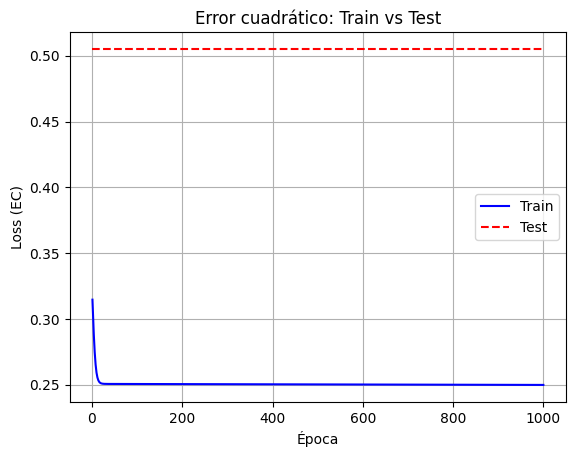

In [ ]:
plot_loss(loss_history_train_n, loss_history_test_n, title = "Evolución de la pérdida con datos normalizados: Train vs Test")

##### `EJERCICIO 5 IMPACTO DEL PARÁMETRO α EN LA CONVERGENCIA DEL MÉTODO`

In [20]:
# Lista de alphas a probar
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1]

results_alpha_sweep = {}
for alpha in tqdm(alphas, desc="Alphas"):

    w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train_n, y_train, X_test_n, y_test, alpha=alpha, max_epochs=10000)
    mse_test, acc_test = evaluate_model(X_test_n, y_test, w, b)
    mse_train, acc_train = evaluate_model(X_train, y_train, w, b)

    results_alpha_sweep[alpha] = {
        'mse_test': mse_test,
        'mse_train': mse_train,
        'acc_train_final': acc_train,
        'acc_test_final': acc_test,
        'acc_train': acc_history_train,
        'acc_test': acc_history_test,
        'loss_train': loss_history_train,
        'loss_test': loss_history_test,
    }
    
    print(f"α = {alpha:.4f} → "
        f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
        f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")

Alphas:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3146, acc=0.5000 | Test loss=0.3044, acc=0.5000
Epoch  200 | Train loss=0.2505, acc=0.4962 | Test loss=0.2511, acc=0.4665
Epoch  400 | Train loss=0.2503, acc=0.5069 | Test loss=0.2509, acc=0.4695
Epoch  600 | Train loss=0.2502, acc=0.5123 | Test loss=0.2508, acc=0.4726
Epoch  800 | Train loss=0.2500, acc=0.5169 | Test loss=0.2507, acc=0.4817
Epoch 1000 | Train loss=0.2499, acc=0.5238 | Test loss=0.2506, acc=0.4817
Epoch 1200 | Train loss=0.2497, acc=0.5284 | Test loss=0.2505, acc=0.4848
Epoch 1400 | Train loss=0.2496, acc=0.5330 | Test loss=0.2504, acc=0.4878
Epoch 1600 | Train loss=0.2494, acc=0.5376 | Test loss=0.2503, acc=0.4939
Epoch 1800 | Train loss=0.2493, acc=0.5414 | Test loss=0.2502, acc=0.5000
Epoch 2000 | Train loss=0.2491, acc=0.5445 | Test loss=0.2501, acc=0.5000
Epoch 2200 | Train loss=0.2490, acc=0.5491 | Test loss=0.2499, acc=0.5061
Epoch 2400 | Train loss=0.2488, acc=0.5529 | Test loss=0.2498, acc=0.5122
Epoch 2600 | Train loss=0.2487, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3146, acc=0.5000 | Test loss=0.2516, acc=0.4817
Epoch  200 | Train loss=0.2491, acc=0.5445 | Test loss=0.2501, acc=0.5000
Epoch  400 | Train loss=0.2476, acc=0.5836 | Test loss=0.2490, acc=0.5335
Epoch  600 | Train loss=0.2461, acc=0.6112 | Test loss=0.2479, acc=0.5610
Epoch  800 | Train loss=0.2447, acc=0.6388 | Test loss=0.2468, acc=0.5915
Epoch 1000 | Train loss=0.2432, acc=0.6656 | Test loss=0.2458, acc=0.6250
Epoch 1200 | Train loss=0.2418, acc=0.6863 | Test loss=0.2448, acc=0.6433
Epoch 1400 | Train loss=0.2405, acc=0.7063 | Test loss=0.2438, acc=0.6555
Epoch 1600 | Train loss=0.2391, acc=0.7209 | Test loss=0.2428, acc=0.6494
Epoch 1800 | Train loss=0.2378, acc=0.7377 | Test loss=0.2418, acc=0.6677
Epoch 2000 | Train loss=0.2365, acc=0.7423 | Test loss=0.2409, acc=0.6768
Epoch 2200 | Train loss=0.2352, acc=0.7439 | Test loss=0.2400, acc=0.6921
Epoch 2400 | Train loss=0.2340, acc=0.7515 | Test loss=0.2391, acc=0.6951
Epoch 2600 | Train loss=0.2328, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3146, acc=0.5000 | Test loss=0.4998, acc=0.5000
Epoch  200 | Train loss=0.4998, acc=0.5000 | Test loss=0.4998, acc=0.5000
Epoch  400 | Train loss=0.4995, acc=0.5000 | Test loss=0.4995, acc=0.5000
Epoch  600 | Train loss=0.4981, acc=0.5000 | Test loss=0.4976, acc=0.5000
Epoch  800 | Train loss=0.4952, acc=0.5000 | Test loss=0.4920, acc=0.5000
Epoch 1000 | Train loss=0.4994, acc=0.5000 | Test loss=0.4994, acc=0.5000
Epoch 1200 | Train loss=0.4981, acc=0.5000 | Test loss=0.4976, acc=0.5000
Epoch 1400 | Train loss=0.4994, acc=0.5000 | Test loss=0.4993, acc=0.5000
Epoch 1600 | Train loss=0.4988, acc=0.5000 | Test loss=0.4986, acc=0.5000
Epoch 1800 | Train loss=0.4969, acc=0.5000 | Test loss=0.4955, acc=0.5000
Epoch 2000 | Train loss=0.4998, acc=0.5000 | Test loss=0.4997, acc=0.5000
Epoch 2200 | Train loss=0.4996, acc=0.5000 | Test loss=0.4996, acc=0.5000
Epoch 2400 | Train loss=0.4999, acc=0.5000 | Test loss=0.4998, acc=0.5000
Epoch 2600 | Train loss=0.4976, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3146, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  400 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  600 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  800 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1000 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1400 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1600 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1800 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2000 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2400 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2600 | Train loss=0.5000, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3146, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  400 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  600 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch  800 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1000 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1400 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1600 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 1800 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2000 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2200 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2400 | Train loss=0.5000, acc=0.5000 | Test loss=0.5000, acc=0.5000
Epoch 2600 | Train loss=0.5000, acc=0.

In [ ]:
from src.plot import plot_train_test_metrics

plot_train_test_metrics(results_alpha_sweep)

Me defino el mejor alpha

In [301]:
best_alpha = 0.001

##### `EJERCICIO 6 IMPACTO DEL TAMAÑO DEL ESCALADO`

In [300]:
X_train_32, y_train_32, X_test_32, y_test_32 = split_dataset(
    healthy_dir=healthy_path,
    parkinson_dir=parkinson_path,
    test_ratio=0.2,
    size=(32, 32)
)

X_train_32_n = normalizar_dataset(X_train_32)
X_test_32_n = normalizar_dataset(X_test_32)

X_train_128, y_train_128, X_test_128, y_test_128 = split_dataset(
    healthy_dir=healthy_path,
    parkinson_dir=parkinson_path,
    test_ratio=0.2,
    size=(128, 128)
)

X_train_128_n = normalizar_dataset(X_train_128)
X_test_128_n = normalizar_dataset(X_test_128)

In [ ]:
scales = {
    32: {
        "Train": (X_train_32_n, y_train_32),
        "Test":  (X_test_32_n,  y_test_32)
    },
    64: {
        "Train": (X_train_n, y_train),
        "Test":  (X_test_n,  y_test)
    },
    128: {
        "Train": (X_train_128_n, y_train_128),
        "Test":  (X_test_128_n,  y_test_128)
    }
}

In [ ]:
results_scales_sweep = {}

for size, datasets in tqdm(
    scales.items(),
    desc="Tamaños",
    dynamic_ncols=True,
    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{remaining} restantes]'
):
    X_train, y_train = datasets["Train"]
    X_test,  y_test  = datasets["Test"]

    w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(
        X_train, y_train, X_test, y_test, alpha=best_alpha, max_epochs=10000
    )

    mse_test, acc_test = evaluate_model(X_test, y_test, w, b)
    mse_train, acc_train = evaluate_model(X_train, y_train, w, b)

    results_scales_sweep[size] = {
        'mse_test': mse_test,
        'mse_train': mse_train,
        'acc_train_final': acc_train,
        'acc_test_final': acc_test,
        'acc_train': acc_history_train,
        'acc_test': acc_history_test,
        'loss_train': loss_history_train,
        'loss_test': loss_history_test,
    }

    print(f"Size = {size:>3} → "
          f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
          f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")

Tamaños:   0%|          | 0/3 [? restantes]

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.2649, acc=0.5000 | Test loss=0.2583, acc=0.5000
Epoch  100 | Train loss=0.2499, acc=0.5061 | Test loss=0.2504, acc=0.4726
Epoch  200 | Train loss=0.2497, acc=0.5169 | Test loss=0.2504, acc=0.4726
Epoch  300 | Train loss=0.2496, acc=0.5184 | Test loss=0.2503, acc=0.4848
Epoch  400 | Train loss=0.2494, acc=0.5322 | Test loss=0.2502, acc=0.4848
Epoch  500 | Train loss=0.2493, acc=0.5452 | Test loss=0.2501, acc=0.4726
Epoch  600 | Train loss=0.2492, acc=0.5529 | Test loss=0.2501, acc=0.4756
Epoch  700 | Train loss=0.2490, acc=0.5552 | Test loss=0.2500, acc=0.4909
Epoch  800 | Train loss=0.2489, acc=0.5544 | Test loss=0.2499, acc=0.4939
Epoch  900 | Train loss=0.2488, acc=0.5544 | Test loss=0.2498, acc=0.4939
Epoch 1000 | Train loss=0.2487, acc=0.5567 | Test loss=0.2498, acc=0.5061
Epoch 1100 | Train loss=0.2485, acc=0.5644 | Test loss=0.2497, acc=0.5091
Epoch 1200 | Train loss=0.2484, acc=0.5660 | Test loss=0.2496, acc=0.5122
Epoch 1300 | Train loss=0.2483, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3142, acc=0.5000 | Test loss=0.2510, acc=0.4970
Epoch  100 | Train loss=0.2500, acc=0.5115 | Test loss=0.2500, acc=0.4878
Epoch  200 | Train loss=0.2492, acc=0.5383 | Test loss=0.2496, acc=0.5091
Epoch  300 | Train loss=0.2484, acc=0.5521 | Test loss=0.2492, acc=0.5244
Epoch  400 | Train loss=0.2477, acc=0.5706 | Test loss=0.2487, acc=0.5244
Epoch  500 | Train loss=0.2469, acc=0.5775 | Test loss=0.2483, acc=0.5213
Epoch  600 | Train loss=0.2462, acc=0.5928 | Test loss=0.2478, acc=0.5335
Epoch  700 | Train loss=0.2454, acc=0.6028 | Test loss=0.2473, acc=0.5427
Epoch  800 | Train loss=0.2447, acc=0.6127 | Test loss=0.2469, acc=0.5457
Epoch  900 | Train loss=0.2440, acc=0.6219 | Test loss=0.2464, acc=0.5579
Epoch 1000 | Train loss=0.2433, acc=0.6281 | Test loss=0.2459, acc=0.5701
Epoch 1100 | Train loss=0.2426, acc=0.6350 | Test loss=0.2455, acc=0.5793
Epoch 1200 | Train loss=0.2419, acc=0.6472 | Test loss=0.2450, acc=0.5915
Epoch 1300 | Train loss=0.2412, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.2559, acc=0.5077 | Test loss=0.3112, acc=0.5000
Epoch  100 | Train loss=0.3654, acc=0.5000 | Test loss=0.3998, acc=0.5000
Epoch  200 | Train loss=0.4085, acc=0.5000 | Test loss=0.3054, acc=0.5000
Epoch  300 | Train loss=0.2481, acc=0.5613 | Test loss=0.2969, acc=0.5030
Epoch  400 | Train loss=0.2713, acc=0.5054 | Test loss=0.4313, acc=0.5000
Epoch  500 | Train loss=0.2891, acc=0.5008 | Test loss=0.4508, acc=0.5000
Epoch  600 | Train loss=0.4487, acc=0.5000 | Test loss=0.3153, acc=0.5000
Epoch  700 | Train loss=0.4475, acc=0.5000 | Test loss=0.3105, acc=0.5000
Epoch  800 | Train loss=0.4242, acc=0.5000 | Test loss=0.2541, acc=0.5488
Epoch  900 | Train loss=0.3006, acc=0.5008 | Test loss=0.4497, acc=0.5000
Epoch 1000 | Train loss=0.2749, acc=0.5084 | Test loss=0.4456, acc=0.5000
Epoch 1100 | Train loss=0.4484, acc=0.5000 | Test loss=0.2905, acc=0.5030
Epoch 1200 | Train loss=0.4435, acc=0.5000 | Test loss=0.2943, acc=0.5000
Epoch 1300 | Train loss=0.4479, acc=0.

KeyboardInterrupt: 

In [ ]:
from src.plot import plot_metrics_by_size

In [ ]:
plot_metrics_by_size(results_scales_sweep)

##### `EJERCICIO 7`

##### Entrenamiento final con el mejor alpha y tamaño de escalado

In [ ]:
results_finales = {}

w_final, b_final, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train_n, y_train, X_test_n, y_test, alpha=best_alpha, max_epochs=150000)
mse_test, acc_test = evaluate_model(X_test_n, y_test, w, b)
mse_train, acc_train = evaluate_model(X_train, y_train, w, b)

results_finales[alpha] = {
    'mse_test': mse_test,
    'mse_train': mse_train,
    'acc_train_final': acc_train,
    'acc_test_final': acc_test,
    'acc_train': acc_history_train,
    'acc_test': acc_history_test,
    'loss_train': loss_history_train,
    'loss_test': loss_history_test,
}

print(f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
      f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")

In [ ]:
plot_train_test_metrics(results_finales, plot_train = True)

##### `Matriz de confusión`

In [ ]:
from src.metrics import confusion_matrix
from src.plot import plot_confusion_matrix

In [280]:
def predecir(X, w, b):
    fx = f_wb(X, w, b)
    return (fx >= 0.5).astype(int)

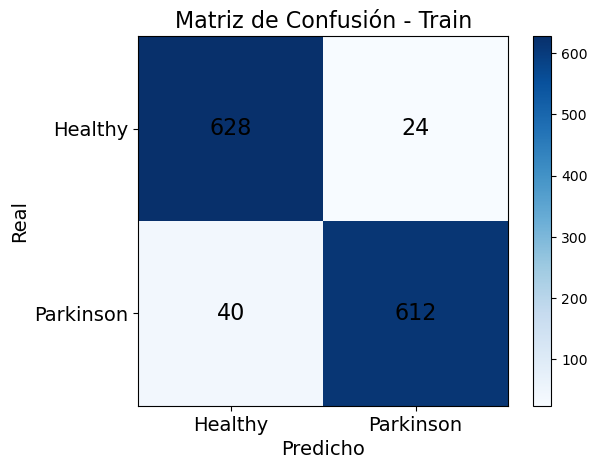

In [ ]:
y_pred_train = predecir(X_train, w_final, b_final)
cm_train = confusion_matrix(y_train, y_pred_train)

plot_confusion_matrix(cm_train , titulo="Matriz de Confusión - Train")

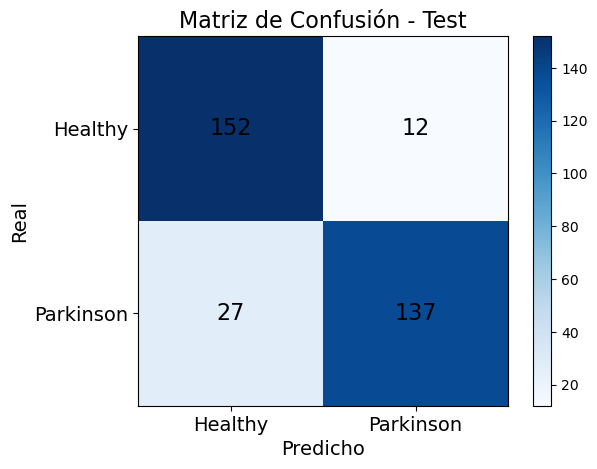

In [ ]:
y_pred_test = predecir(X_test, w_final, b_final)
cm_test = confusion_matrix(y_test, y_pred_test)

plot_confusion_matrix(cm_test, titulo="Matriz de Confusión - Test")

#### `Parte 2: Ascenso de Gradiente`

##### `EJERCICIO 1 DERIVADAS`

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivadas_parciales(w, b, X, y):
    z = np.dot(X, w) + b          
    y_pred = sigmoid(z)          
    error = y_pred - y          

    df_dw = np.dot(X.T, error) 
    df_db = np.sum(error)  

    return df_dw, df_db

##### `EJERCICIO 2 ASCENSO POR GRADIENTE`

In [ ]:
def log_verosimilitud(w, b, X, y):
    """
    L(w,b) = sum_i [ d_i*log(σ(z_i)) + (1-d_i)*log(1-σ(z_i)) ]
    """
    z      = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    eps = 1e-12     # para evitar log(0)
    return np.sum(y * np.log(y_pred  + eps) + (1-y) * np.log(1 - y_pred + eps))

def gradient_ascent(X_train, y_test, alpha=1e-3, num_iters=1000, verbose=True):

    N, K = X_train.shape
    w = np.zeros(K)   # inicialización
    b = 0.0

    history = {
        'll': [],    # log-verosimilitud
    }

    for it in range(1, num_iters+1):
        # calc gradientes
        grad_w, grad_b = derivadas_parciales(w, b, X_train, y_test)

        # ascenso
        w += alpha * grad_w
        b += alpha * grad_b

        if it % 10 == 0 or it == 1:
            ll = log_verosimilitud(w, b, X_train, y_test)
            history['ll'].append(ll)
            if verbose and it % 100 == 0:
                print(f"Iter {it:4d} — log-verosimilitud = {ll:.4f}")

    return w, b, history

usamos la mejor escala encontrada en la parte 1: 64 x 64 con los datos normalizados

In [ ]:
# X_train_n, X_test_n

##### `EJERCICIO 3`

##### `EJERCICIO 4 IMPACTO DEL PARÁMETRO α EN LA CONVERGENCIA DEL MÉTODO`

##### `EJERCICIO 5 COMPARACIÓN DE RESULTADOS`